In [11]:
from math import log, ceil
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
from matplotlib import animation
from IPython.display import HTML

In [ ]:
#Determiner l'évolution de la distance Terre-Lune en se plaçant dans le référentiel de la Terre par application 
#méthode Runge Kutta 4.

In [12]:
#valeurs de départ
G=6.67408e-11  #constante gravitationelle
mt=5.972e24    #masse de la terre
ml=7.348e22    #masse de la Lune
M=mt+ml

t=30*24*60*60 #nombres de secondes dans 30 jours

In [76]:
#conditions initiales

r_min=-362600000       #valeur minimale distance Terre-Lune
v_initial=1083.434974  #vitesse de la Lune à l'apogée de l'orbite

In [139]:
#vecteur u
u = numpy.empty((t,4))
u_in=numpy.array([r_min,0.,0.,v_initial])
u[0]=u_in

In [152]:
C=-G*M
def f(u):
    x=u[1]
    y=u[3]
    vx=(C*u[0]/(((u[0]*u[0])+(u[2]*u[2]))**(3/2)))
    vy=(C*u[2]/(((u[0]*u[0])+(u[2]*u[2]))**(3/2)))
    return numpy.array([x,vx,y,vy])


In [126]:
def rK4(u,f,dt):
    k1=f(u)
    k2=f(u+k1*dt/2)
    k3=f(u+k2*dt/2)
    k4=f(u+k3*dt)
    return u+(k1+2*k2+2*k3+k4)*dt/6

In [160]:
for i in range(t-1):
    u[i+1]=rK4(u[i],f,1)

In [162]:
print u

[[ -3.62600000e+08   0.00000000e+00   0.00000000e+00   1.08343497e+03]
 [ -3.61793241e+08   1.61411716e+06   1.08263086e+03   1.08102083e+03]
 [ -3.59369359e+08   3.23546522e+06   2.16041540e+03   1.07372419e+03]
 ..., 
 [ -3.40600930e+14  -1.27105240e+08  -1.80435758e+12  -6.73349009e+05]
 [ -3.40601057e+14  -1.27105238e+08  -1.80435826e+12  -6.73348999e+05]
 [ -3.40601184e+14  -1.27105236e+08  -1.80435893e+12  -6.73348990e+05]]


In [194]:
x=u[:,0]    #projection sur les abscisses de la position de la Lune par rapport à la Terre
y=u[:,2]    #projection sur les ordonnées de la position de la Lune par rapport à la Terre





In [167]:
#2) Que vaut le demi grand axe a et le demi grand axe b selon vos calculs?
# demi grand axe a: a= ((max(r1))+(min(r1)))/2

a= (abs(min(x))+(max(x)))/2
a


170300848562636.31

In [168]:
#3) Que vaut la période de l'orbite?
from math import pi
G=9.67408*pow(10,-11)
Mt=5.972*pow(10,24)
ml=7.348*pow(10,22)
P=(2*pi)*(a*a*a/((G*(Mt+ml))**1/2)) #en appliquant la formule pour le calcul de la période de l'orbite 
P                                   #valeur de la période 

1.0612552131377887e+29

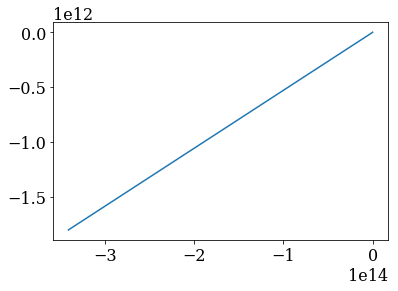

In [170]:
plt.plot(x,y)
plt.show()